<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab :

1. Algoritma KNN merupakan algoritma yang melakukan prediksi label dengan melihat jumlah tetangga terdekatnya. Proses algoritma KNN yaitu

- Menentukan jumlah nikai k yang bergantung pada sebaran data yang ada. Jika sebaran data rapat maka nilai k yang digunakan merupakan angka kecil, jika sebaran data lebar maka nilai k yang digunakan merupakan angka besar. Sedangkan nilai default dari k adalah angka 5.
- Setelah nilai k ditentukan, tetangga data yang terdekat sebanyak nilai k akan ditemukan. Tetangga terdekat terhadap data point yang baru berdasarkan pada euclidean distance, lalu diperoleh 5 data baru.
- Melakukan voting untuk menghitung jumlah terbanyak data point tersebut dengan data point yang baru.
- Memasukkan data point yang baru ke label tetangga yang terbanyak.

2. Kekurangan dari algoritma KNN diantaranya, algoritma perlu menunjukkan parameter nilai k secara manual, apabila nilai k tidak didefinisikan di awal maka kode program tidak dapat membaca algoritma tersebut. Selain itu algoritma KNN tidak dapat menangani nilai hilang atau missing value secara implisit dan sangat sensitif terhadap data pencilan (outlier)

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display

In [3]:
uniform_scores = []
for k in range (2,20):
    model_uni = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    model_uni.fit(X_train, y_train)
    y_test_uni = model_uni.predict(X_test).reshape(-1,1)
    uniform_scores.append(accuracy_score(y_test, y_test_uni))
print('Uniform Scores : ')
display(uniform_scores)

Uniform Scores : 


[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666]

In [4]:
distance_scores = []
for k in range (2,20):
    model_dis = KNeighborsClassifier(n_neighbors=k, weights='distance')
    model_dis.fit(X_train, y_train)
    y_test_dis = model_dis.predict(X_test).reshape(-1,1)
    distance_scores.append(accuracy_score(y_test, y_test_dis))
print('Distance Scores : ')
display(distance_scores)

Distance Scores : 


[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

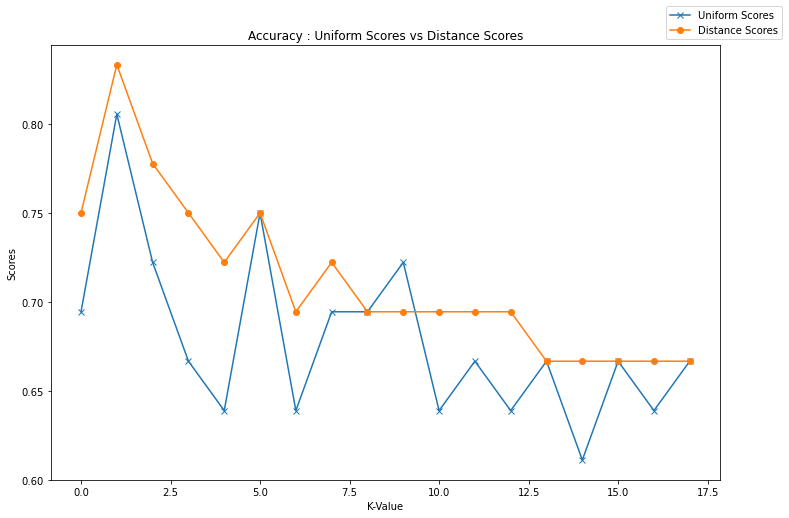

In [6]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(uniform_scores, marker='x', label='Uniform Scores')
plt.plot(distance_scores, marker='o', label='Distance Scores')

#custom axis label dan title
ax.set_xlabel('K-Value')
ax.set_ylabel('Scores')
ax.set_title('Accuracy : Uniform Scores vs Distance Scores')

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Aplikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [7]:
import numpy as np

rng = np.random.RandomState(1)

x = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(30, 4) (30,)
(20, 4) (20,)


In [10]:
linear = LinearRegression()
model = linear.fit(x_train, y_train)

In [11]:
linear.intercept_

0.5000000021041018

In [12]:
linear.coef_

array([ 1.5, -5. ,  9. , 10. ])